<a href="https://colab.research.google.com/github/Jessekato/Econometrics/blob/main/S%26P_500_Stationarity_Test_with_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


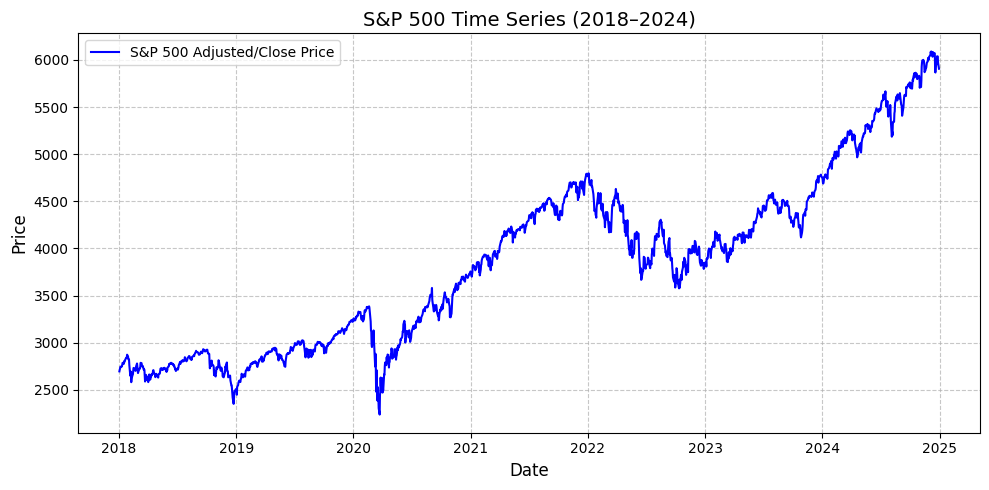


--- Augmented Dickey-Fuller Test Results ---
ADF Statistic: 0.10061403481501167
p-value: 0.9661029920901631
Critical Values: {'1%': np.float64(-3.4340943816187823), '5%': np.float64(-2.8631939359068803), '10%': np.float64(-2.5676505066098376)}

--- Interpretation ---
To determine stationarity:
1. Compare the 'ADF Statistic' to the 'Critical Values'.
   If ADF Statistic < Critical Value (e.g., at 5%), reject H0 (series is stationary).
2. Alternatively, compare the 'p-value' to a significance level (e.g., 0.05).
   If p-value < 0.05, reject H0 (series is stationary).
   If p-value >= 0.05, fail to reject H0 (series is non-stationary, has a unit root).


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# --- Step 1: Download real economic data for equities (e.g., S&P 500 Index) ---
# We use Yahoo Finance to get daily closing prices for the S&P 500.
# The '^GSPC' ticker symbol represents the S&P 500 index.
# We download 'Adj Close' prices, which are adjusted for splits and dividends,
# providing a consistent view of historical value.

try:
    # Attempt to download the S&P 500 data
    data = yf.download('^GSPC', start='2018-01-01', end='2024-12-31')

    # Check if the DataFrame is empty (e.g., due to download failure or invalid ticker/dates)
    if data.empty:
        print("Error: No data downloaded for S&P 500. Please check the ticker or date range.")
        sp500 = None # Set sp500 to None to prevent further errors
    else:
        # Prioritize 'Adj Close', fall back to 'Close' if 'Adj Close' is not available
        if 'Adj Close' in data.columns:
            sp500 = data['Adj Close']
        elif 'Close' in data.columns:
            sp500 = data['Close']
            print("Warning: 'Adj Close' not found. Using 'Close' prices instead.")
        else:
            print("Error: Neither 'Adj Close' nor 'Close' column found in downloaded data.")
            sp500 = None # Set sp500 to None to prevent further errors

except Exception as e:
    print(f"An error occurred during data download: {e}")
    sp500 = None # Set sp500 to None in case of an exception

# Proceed only if sp500 data was successfully loaded
if sp500 is not None and not sp500.empty:
    # --- Step 2: Plot the time series ---
    # Visual inspection is the first step in understanding time series properties.
    # A clear trend often suggests non-stationarity.
    plt.figure(figsize=(10, 5)) # Set the size of the plot
    plt.plot(sp500, label='S&P 500 Adjusted/Close Price', color='blue') # Plot the series
    plt.title('S&P 500 Time Series (2018–2024)', fontsize=14) # Set plot title
    plt.xlabel('Date', fontsize=12) # Set x-axis label
    plt.ylabel('Price', fontsize=12) # Set y-axis label
    plt.legend(fontsize=10) # Display legend
    plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

    # --- Step 3: Perform the Augmented Dickey-Fuller (ADF) Test ---
    # The ADF test is a formal statistical test for a unit root, which implies non-stationarity.
    # Null Hypothesis (H0): The series has a unit root (non-stationary).
    # Alternative Hypothesis (H1): The series is stationary.

    # Before performing the test, ensure there are no missing values in the data.
    # .dropna() removes any NaN values which could cause errors in adfuller().
    adf_result = adfuller(sp500.dropna())

    # Collect the most important outputs from the ADF test for clear presentation.
    # adf_result[0] is the ADF statistic.
    # adf_result[1] is the p-value.
    # adf_result[4] is a dictionary containing critical values at different significance levels.
    adf_output = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4]
    }

    # Print the collected results.
    print("\n--- Augmented Dickey-Fuller Test Results ---")
    for key, value in adf_output.items():
        print(f"{key}: {value}")

    # Interpretation guidance:
    print("\n--- Interpretation ---")
    print("To determine stationarity:")
    print("1. Compare the 'ADF Statistic' to the 'Critical Values'.")
    print("   If ADF Statistic < Critical Value (e.g., at 5%), reject H0 (series is stationary).")
    print("2. Alternatively, compare the 'p-value' to a significance level (e.g., 0.05).")
    print("   If p-value < 0.05, reject H0 (series is stationary).")
    print("   If p-value >= 0.05, fail to reject H0 (series is non-stationary, has a unit root).")
else:
    print("\nSkipping plot and ADF test due to data download or column selection issues.")